## Gradient Descent

In this notebook we will implement gradient descent for a single neuron. To simplify this as much as possible we will assume we have no bias `b = 0` and no activation function. The image below shows the neuron we will be coding and the relevant equations needed to update the weight using gradient descent. 

<img src="Gradient Descent Notebook-1.jpg" width=600 align="center">

The recipe we are following is:
1. make a prediction for our single sample
2. calculate the loss for this single sample
3. calculate the value of the derivative for this single sample
4. use the derivative and the learning rate to update the value of the weight
5. repeat until the loss is a minimum (that is, stops decreasing)

#### Stochastic Gradient Descent: A single sample

In [9]:
y = 4 # correct answer
x = 2 # we have one sample and one feature 
w = 0.1 # initial value for our weight

lr = 0.0127 # the learning rate

n_iterations = 100 # number of iterations of gradient descent, that is, number of times we update w

for i in range(n_iterations):
    y_hat = w * x # make prediction using current value for w
    L = (y - y_hat)**2  # calculate the loss (our loss function = mean squared error)
    dL_dw = -2 * (y - y_hat)*x   # calculate derivative needed to update the weight (see image above) 
    w = w - lr*dL_dw # update the weight
    # the code below allows you to print out answers after every x iterations; adjust to suit your needs
    if (i%10 == 0):
        print(f"iteration: {i} weight: {w:.4f}  prediction: {y_hat:.4f}  Loss: {L:.8f}")

iteration: 0 weight: 0.2930  prediction: 0.2000  Loss: 14.44000000
iteration: 10 weight: 1.4153  prediction: 2.6984  Loss: 1.69418978
iteration: 20 weight: 1.7997  prediction: 3.5542  Loss: 0.19877279
iteration: 30 weight: 1.9314  prediction: 3.8473  Loss: 0.02332125
iteration: 40 weight: 1.9765  prediction: 3.9477  Loss: 0.00273619
iteration: 50 weight: 1.9920  prediction: 3.9821  Loss: 0.00032103
iteration: 60 weight: 1.9972  prediction: 3.9939  Loss: 0.00003766
iteration: 70 weight: 1.9991  prediction: 3.9979  Loss: 0.00000442
iteration: 80 weight: 1.9997  prediction: 3.9993  Loss: 0.00000052
iteration: 90 weight: 1.9999  prediction: 3.9998  Loss: 0.00000006


#### Stochastic Gradient Descent: Multiple samples

We will now repeat what we did above but now our training data will have 5 samples. 

In [10]:
X = [1, 2, 3, 3, 4]  # 5 samples with 1 feature value each
Y = [2, 1, 4, 2, 5] # correct answers for each sample

Let's plot the data so we can see what we are dealing with. 

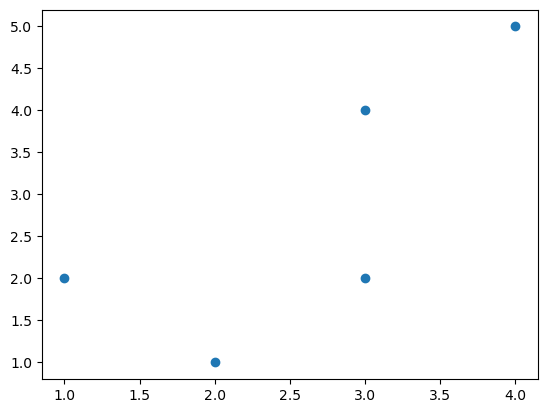

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)

Using the plot above, convince yourself that for our neuron we will not be able to make `L = 0` as we could with the single sample. That is, there is no line we can draw that will pass through all the points (that is how the loss would equal to 0). 

In the following code we will apply stochastic gradient descent (update weight after each sample in the trainging data) to the training data of 5 samples we created above. 

In [12]:
w = 0.1 # initial value for our weight
lr = 0.0013

n_epochs = 100
epoch_counter = 0

for i in range(n_epochs):
    epoch_counter = epoch_counter + 1 # use this to keep track of how many times we have gone through entire training data
    Total_L = 0 # set the total_loss (sum of losses from each sample in training set) to 0 at start of each epoch
    for x, y in zip(X, Y): # iterate through the training data one sample at a time
        y_hat = w * x # make prediction for current sample
        L = (y - y_hat)**2  # calculate loss for current sample
        Total_L = Total_L + L # add the loss for current sample to total loss
        dL_dw = -2 * (y - y_hat)*x   # calculate derivative for current sample
        w = w - lr*dL_dw # update the weight using the derivative and loss for current sample
    print(f"Epoch {epoch_counter} weight: {w:.8f}  Total Loss: {Total_L:.6f}")

Epoch 1 weight: 0.19583167  Total Loss: 39.599796
Epoch 2 weight: 0.28229229  Total Loss: 33.127512
Epoch 3 weight: 0.36029822  Total Loss: 27.860079
Epoch 4 weight: 0.43067622  Total Loss: 23.573291
Epoch 5 weight: 0.49417220  Total Loss: 20.084655
Epoch 6 weight: 0.55145913  Total Loss: 17.245631
Epoch 7 weight: 0.60314417  Total Loss: 14.935316
Epoch 8 weight: 0.64977510  Total Loss: 13.055305
Epoch 9 weight: 0.69184616  Total Loss: 11.525502
Epoch 10 weight: 0.72980323  Total Loss: 10.280714
Epoch 11 weight: 0.76404861  Total Loss: 9.267882
Epoch 12 weight: 0.79494525  Total Loss: 8.443818
Epoch 13 weight: 0.82282062  Total Loss: 7.773374
Epoch 14 weight: 0.84797015  Total Loss: 7.227942
Epoch 15 weight: 0.87066040  Total Loss: 6.784238
Epoch 16 weight: 0.89113184  Total Loss: 6.423314
Epoch 17 weight: 0.90960145  Total Loss: 6.129747
Epoch 18 weight: 0.92626498  Total Loss: 5.890987
Epoch 19 weight: 0.94129905  Total Loss: 5.696820
Epoch 20 weight: 0.95486298  Total Loss: 5.538932

#### Compare with scikit-learn

Our neuron is really just performing linear regression since we have no activation function. So, let's perform linear regression on the data and see what value scikit-learn gives us for `w`. 

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

X_arr = np.array(X).reshape(-1, 1)
Y_arr = np.array(Y) 

lin_reg = LinearRegression()
lin_reg.fit(X_arr, Y_arr)

lin_reg.coef_

array([1.07692308])

### Batch Gradient Descent

We will now implement batch gradient descent where we will only make an update to the weight after we have processed all of the samples. The recipe is as follows: 
1. make predictions for all samples in our training data
2. calculate the average loss for all samples in our training data
3. calculate the average value of the derivative for all samples in our training data
4. update the value of the weight
5. repeat until the loss is a minimum (that is, stops decreasing)


In [14]:
X_new = np.array([1, 2, 3, 3, 4]).reshape(-1, 1) 
Y_new = np.array([2, 1, 4, 2, 5]).reshape(-1, 1) 

w = 0.1 
lr = 0.013 

n_epochs = 150

for i in range(n_epochs):
    Y_hat = w*X_new # make predictions for all samples (remember X_new is an array with 5 samples)
    sample_losses = (Y_new - Y_hat)**2 # calculate the loss for all 5 samples (result is an array with 5 values)
    avg_loss = sample_losses.mean() # calculate the average loss for the training data
    dLoss_dw = (-2 * np.multiply((Y_new - Y_hat), X_new)).mean() # calculate the average of the derivatives
    w = w - lr*dLoss_dw # update the weight using the average value of the derivative
    print(f"Epoch {i + 1} weight: {w:.4f}  AVG Loss: {avg_loss:.4f}")

Epoch 1 weight: 0.2981  AVG Loss: 8.3980
Epoch 2 weight: 0.4561  AVG Loss: 5.6848
Epoch 3 weight: 0.5820  AVG Loss: 3.9605
Epoch 4 weight: 0.6823  AVG Loss: 2.8647
Epoch 5 weight: 0.7624  AVG Loss: 2.1682
Epoch 6 weight: 0.8262  AVG Loss: 1.7256
Epoch 7 weight: 0.8770  AVG Loss: 1.4443
Epoch 8 weight: 0.9176  AVG Loss: 1.2656
Epoch 9 weight: 0.9499  AVG Loss: 1.1519
Epoch 10 weight: 0.9756  AVG Loss: 1.0797
Epoch 11 weight: 0.9962  AVG Loss: 1.0339
Epoch 12 weight: 1.0126  AVG Loss: 1.0047
Epoch 13 weight: 1.0256  AVG Loss: 0.9862
Epoch 14 weight: 1.0360  AVG Loss: 0.9744
Epoch 15 weight: 1.0443  AVG Loss: 0.9669
Epoch 16 weight: 1.0509  AVG Loss: 0.9621
Epoch 17 weight: 1.0562  AVG Loss: 0.9591
Epoch 18 weight: 1.0604  AVG Loss: 0.9572
Epoch 19 weight: 1.0638  AVG Loss: 0.9560
Epoch 20 weight: 1.0664  AVG Loss: 0.9552
Epoch 21 weight: 1.0686  AVG Loss: 0.9547
Epoch 22 weight: 1.0702  AVG Loss: 0.9544
Epoch 23 weight: 1.0716  AVG Loss: 0.9542
Epoch 24 weight: 1.0727  AVG Loss: 0.9541
E